# Heart Faliure Prediction

# Imports

In [1]:
import pandas as pd #BIblioteca para construção e manipulação de data frames
import numpy as np # BIblioteca para manipulação de dados numéricos
import seaborn as sns #Biblioteca utilizada para plotar graficos
import matplotlib.pyplot as plt #Biblioteca utilizada para plotar graficos
from scipy.stats import norm # Biblioteca importa uma distribuição normal
from scipy.stats import boxcox #
from sklearn.svm import SVC #Ver documentação
from sklearn.model_selection import train_test_split #Ver documentação
from sklearn.model_selection import cross_validate #Ver documentação
from sklearn.metrics import plot_confusion_matrix #Ver documentação
from sklearn.preprocessing import StandardScaler #Ver documentação
from sklearn.preprocessing import MinMaxScaler #Ver documentação
from sklearn.preprocessing import RobustScaler #Ver documentação

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv") #Transforma arquivo CSV em DataFrame do pandas
column_names = list(data.columns) #Armazena nome das colunas na variável
data.head() 
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Fonte dos dados: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data**




# Investigando Estratificação dos dados Pelas classes de "DEATH_EVENTS"

In [3]:
print('Ocorrência de óbito',round((data.DEATH_EVENT.sum()/data.DEATH_EVENT.count()*100),2),'%')
print('Sbreviventes',round(100 - (data.DEATH_EVENT.sum()/data.DEATH_EVENT.count()*100),2),'%')

Ocorrência de óbito 32.11 %
Sbreviventes 67.89 %


Percebemos que a amóstra não e balanceada em suas Classes, sendo a ocorrência de óbito = 32.11 %  e a de sobreviventes = 67.89 %

# Realizando Predição dos dados em seu estado de fornecimento

Realizamos a divisão entre dados de treino e estes estratificando a amostra pela proporção da classe: 'DEATH_EVENTS'

In [4]:
#Score for random state 18
X, y = data.drop(columns='DEATH_EVENT'), data.DEATH_EVENT 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 18, stratify=y)
clf = SVC()
clf.fit(x_train, y_train)
print('Acurácia do modelo = {}% '.format(clf.score(x_test,y_test) *100))


Acurácia do modelo = 68.0% 


## Matriz de confusão da amostra

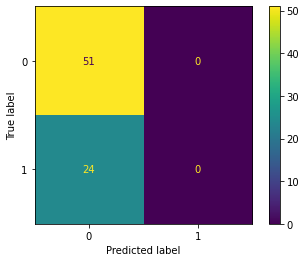

In [5]:
matrix = plot_confusion_matrix(clf,x_test, y_test)
matrix

In [6]:
matrix.figure_.savefig("raw.png")

In [7]:
clf.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

 Percebemos que o modelo classifica todas as amostras testadas como sobreviventes, portanto sua acurária é igual
a proporção de casos de sobrevivente. Por consequencia o modelo classifica erronamente todos os pacientes que foram à óbito

### Realizando medição de acurácia por Cross validation

In [8]:
#sns.distplot(np.log(data.serum_creatinine), fit=norm)
clf = SVC()
scores = cross_validate(clf, X, y, cv=5)
scores

{'fit_time': array([0.00294638, 0.00283456, 0.00308824, 0.00246668, 0.00291109]),
 'score_time': array([0.00131249, 0.0012753 , 0.00161505, 0.00118542, 0.00119448]),
 'test_score': array([0.66666667, 0.68333333, 0.68333333, 0.68333333, 0.6779661 ])}

# Comparando métodos de normalização de dados 

Inicialmente apresentamos os valores de Skewness e Curtose e da correlação desses dados com a categoria DEATH_EVENT

In [9]:
skew_kurt = pd.DataFrame(pd.concat([data.corr().DEATH_EVENT,data.kurt(), data.skew()], axis=1)).rename(columns = {"DEATH_EVENT":"Death_Corr", 0:"Kurt", 1:"Skew"})
skew_kurt

,Death_Corr,Kurt,Skew
age,0.253729,-0.184871,0.423062
anaemia,0.066270,-1.935563,0.278261
creatinine_phosphokinase,0.062728,25.149046,4.463110
diabetes,-0.001943,-1.901254,0.333929
ejection_fraction,-0.268603,0.041409,0.555383
high_blood_pressure,0.079351,-1.618076,0.626732
platelets,-0.049139,6.209255,1.462321
serum_creatinine,0.294278,25.828239,4.455996
serum_sodium,-0.195204,4.119712,-1.048136
sex,-0.004316,-1.618076,-0.626732


# Log

## Realizando a lormalizaçao dos dados numéricos não categóricos através da aplicação de logarítmo 

In [10]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
for column in data.columns:
    if column not in ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]:
        data[column] = np.log(data[column])

A tabela abaixo demosntra a relação entre Kurtose, Skewness, e a correlação 

In [11]:
#pd.DataFrame(pd.concat([ skew_kurt ,data.corr().DEATH_EVENT,data.kurt(), data.skew()], axis=1)).rename(columns = {"DEATH_EVENT":"log_Death_corr", 0:"log_Kurt", 1:"log_Skew"})

In [12]:
X, y = data.drop(columns='DEATH_EVENT'), data.DEATH_EVENT
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18,  stratify=X.sex)
clf = SVC()
clf.fit(x_train, y_train)
print('Acurácia do modelo = {}% '.format(clf.score(x_test,y_test) *100))

Acurácia do modelo = 82.66666666666667% 


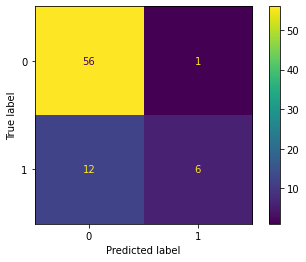

In [13]:
matrix = plot_confusion_matrix(clf,x_test, y_test)

In [14]:
matrix.figure_.savefig("log.png")

In [15]:
clf = SVC()
scores = cross_validate(clf, X, y, cv=5)
scores

{'fit_time': array([0.00261235, 0.00252843, 0.0023849 , 0.00242352, 0.00230241]),
 'score_time': array([0.00123572, 0.00122309, 0.00117493, 0.0011723 , 0.00126696]),
 'test_score': array([0.9       , 0.86666667, 0.71666667, 0.68333333, 0.6779661 ])}

# Sqrt

In [16]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
for column in data.columns:
    if column not in ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]:
        data[column] = np.sqrt(data[column])

In [17]:
#pd.DataFrame(pd.concat([ skew_kurt ,data.corr().DEATH_EVENT,data.kurt(), data.skew()], axis=1)).rename(columns = {"DEATH_EVENT":"sqrt_Death_corr", 0:"sqrt_Kurt", 1:"sqrt_Skew"})

In [18]:
X, y = data.drop(columns='DEATH_EVENT'), data.DEATH_EVENT
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18, stratify=y)
clf = SVC()
clf.fit(x_train, y_train)
print('Acurácia do modelo = {}% '.format(clf.score(x_test,y_test) *100))

Acurácia do modelo = 68.0% 


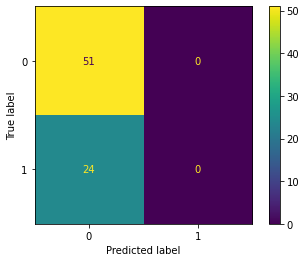

In [19]:
matrix = plot_confusion_matrix(clf,x_test, y_test)

In [20]:
matrix.figure_.savefig("sqrt.png")

In [21]:
clf = SVC()
scores = cross_validate(clf, X, y, cv=5)
scores

{'fit_time': array([0.00404239, 0.00333214, 0.00300789, 0.00256777, 0.00238705]),
 'score_time': array([0.00180602, 0.00151348, 0.00119567, 0.0011878 , 0.00125194]),
 'test_score': array([0.66666667, 0.68333333, 0.68333333, 0.68333333, 0.6779661 ])}

# Box-Cox

In [22]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
for column in data.columns:
    if column not in ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]:
        data[column] = boxcox(data[column])[0]

In [23]:
#pd.DataFrame(pd.concat([ skew_kurt ,data.corr().DEATH_EVENT,data.kurt(), data.skew()], axis=1)).rename(columns = {"DEATH_EVENT":"Box-Cox_Death_corr", 0:"Box-Cox_Kurt", 1:"Box-cox_Skew"})

In [24]:
X, y = data.drop(columns='DEATH_EVENT'), data.DEATH_EVENT
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18, stratify=y)
clf = SVC()
clf.fit(x_train, y_train)
print('Acurácia do modelo = {}% '.format(clf.score(x_test,y_test) *100))

Acurácia do modelo = 68.0% 


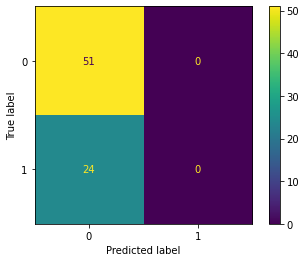

In [25]:
matrix = plot_confusion_matrix(clf,x_test, y_test)

In [26]:
matrix.figure_.savefig("box-cox.png")

In [27]:
clf = SVC()
scores = cross_validate(clf, X, y, cv=5)
scores

{'fit_time': array([0.00471044, 0.00252604, 0.00449204, 0.00277209, 0.00258136]),
 'score_time': array([0.00179195, 0.00129128, 0.00134563, 0.00120258, 0.0012033 ]),
 'test_score': array([0.66666667, 0.68333333, 0.68333333, 0.68333333, 0.6779661 ])}

# Aplicando escaladores de dados (testar diferentes Scalers)

In [28]:
def scale_fit_data(scaler):
    data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
    for column in data.columns:
        if column not in ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]:
            data[column] = np.log(data[column])
    X = scaler.fit_transform(data.drop(columns = ["DEATH_EVENT"]))
    y = list(data["DEATH_EVENT"])
    return(X,y)

# Standart Scaler

In [29]:
scaler = StandardScaler()

In [30]:
X,y = scale_fit_data(scaler)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18, stratify=y)
clf = SVC()
clf.fit(x_train, y_train)
clf.score(x_test,y_test)
#confusion_matrix(clf.predict(x_test), y_test)


0.8533333333333334

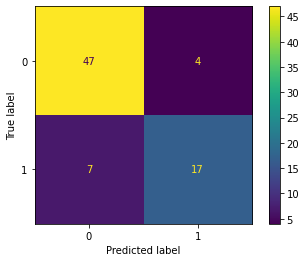

In [31]:
matrix = plot_confusion_matrix(clf,x_test, y_test)

In [32]:
matrix.figure_.savefig("standart_scaler.png")

In [33]:
clf = SVC()
scores = cross_validate(clf, X, y, cv=5)
scores

{'fit_time': array([0.00128675, 0.00117564, 0.00119853, 0.00120449, 0.00106025]),
 'score_time': array([0.00035739, 0.00032854, 0.00032139, 0.0003202 , 0.00030446]),
 'test_score': array([0.76666667, 0.8       , 0.83333333, 0.78333333, 0.71186441])}

# Min_Max_scaler

In [34]:
scaler = MinMaxScaler()

In [35]:
X , y = scale_fit_data(scaler)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18, stratify=y)
clf = SVC()
clf.fit(x_train, y_train)
clf.score(x_test,y_test)




0.8266666666666667

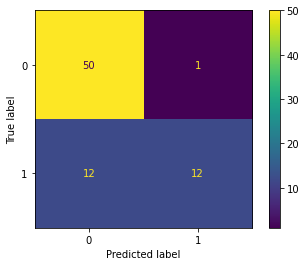

In [36]:
matrix = plot_confusion_matrix(clf,x_test, y_test)

In [37]:
matrix.figure_.savefig("min_max.png")

In [38]:
clf = SVC()
scores = cross_validate(clf, X, y, cv=5)
scores

{'fit_time': array([0.00179052, 0.00167394, 0.00174356, 0.00126266, 0.00107265]),
 'score_time': array([0.00051117, 0.00046849, 0.00047874, 0.00032783, 0.00030804]),
 'test_score': array([0.85      , 0.81666667, 0.81666667, 0.66666667, 0.6779661 ])}

# Robust Scaler

In [39]:
scaler = RobustScaler()

In [40]:
X , y = scale_fit_data(scaler)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18, stratify=y)
clf = SVC()
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.84

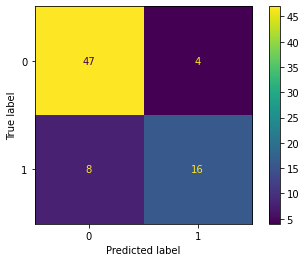

In [41]:
matrix = plot_confusion_matrix(clf,x_test, y_test)

In [42]:
matrix.figure_.savefig("robust.png")

In [43]:
clf = SVC()
scores = cross_validate(clf, X, y, cv=5)
scores

{'fit_time': array([0.00131917, 0.00117564, 0.00103545, 0.00106764, 0.00104237]),
 'score_time': array([0.00035548, 0.00032043, 0.00029898, 0.00031066, 0.00029755]),
 'test_score': array([0.76666667, 0.8       , 0.88333333, 0.76666667, 0.69491525])}

# Feature Sel by Corr > 0.25

In [44]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data = pd.DataFrame(data, columns=column_names)
scaler = StandardScaler()
for column in data.columns:
    if column not in ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]:
        data[column] = np.log(data[column])
data = data.loc[: ,abs(data.corr().DEATH_EVENT)> 0.25]
X = scaler.fit_transform(data.drop(columns = ["DEATH_EVENT"]))
y = list(data["DEATH_EVENT"])

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18, stratify= y)
clf = SVC()
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.8933333333333333

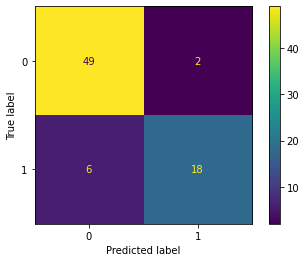

In [46]:
matrix = plot_confusion_matrix(clf,x_test, y_test)

In [47]:
matrix.figure_.savefig("feature_selec.png")

In [48]:
clf = SVC()
scores = cross_validate(clf, X, y, cv=5)
scores

{'fit_time': array([0.00087667, 0.00085855, 0.0008378 , 0.00085568, 0.00073218]),
 'score_time': array([0.00027323, 0.0002532 , 0.00024962, 0.00024509, 0.00024724]),
 'test_score': array([0.7       , 0.81666667, 0.91666667, 0.78333333, 0.71186441])}

In [49]:
data

,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,2.995732,0.641854,1.386294,1
1,3.637586,0.095310,1.791759,1
2,2.995732,0.262364,1.945910,1
3,2.995732,0.641854,1.945910,1
4,2.995732,0.993252,2.079442,1
...,...,...,...,...
294,3.637586,0.095310,5.598422,0
295,3.637586,0.182322,5.602119,0
296,4.094345,-0.223144,5.627621,0
297,3.637586,0.336472,5.634790,0
